# **Providing Data Driven Decisions for Marketing**

## Overview

This project aims to provide data-driven insights for optimizing marketing strategies through the analysis of Facebook ad spend and its impact on sales conversions. Utilizing Google's PACE (Prepare, Analyze, Communicate, Execute) framework, we will systematically approach the data to uncover actionable intelligence that can significantly enhance the effectiveness of ad campaigns. The process is outlined as follows:

- **Prepare**: In this initial phase, we will collect and clean the data related to Facebook ad campaigns. This includes ad identifiers, campaign specifics, demographic information, engagement metrics (impressions, clicks), financials (spend), and conversion outcomes (inquiries, purchases).

- **Analyze**: Leveraging statistical and machine learning techniques, we will analyze the cleaned dataset to identify patterns and correlations between ad spend and sales conversions. This phase focuses on understanding which aspects of the campaigns (e.g., targeting, budget allocation) are most influential in driving conversions.

- **Communicate**: Findings from the analysis will be synthesized into clear, compelling insights. Visualizations and reports will be prepared to communicate the effectiveness of current ad campaigns and to recommend strategies for optimization.

- **Execute**: Based on the insights gained, we will propose actionable strategies for optimizing future Facebook ad campaigns. This could involve adjustments to targeting criteria, budget reallocation, or creative changes aimed at improving conversion rates.

By applying the PACE framework, this project seeks to empower the company with a data-backed approach to refining its Facebook advertising strategy, ultimately leading to more efficient use of marketing budgets and improved sales outcomes.

## PACE Stages





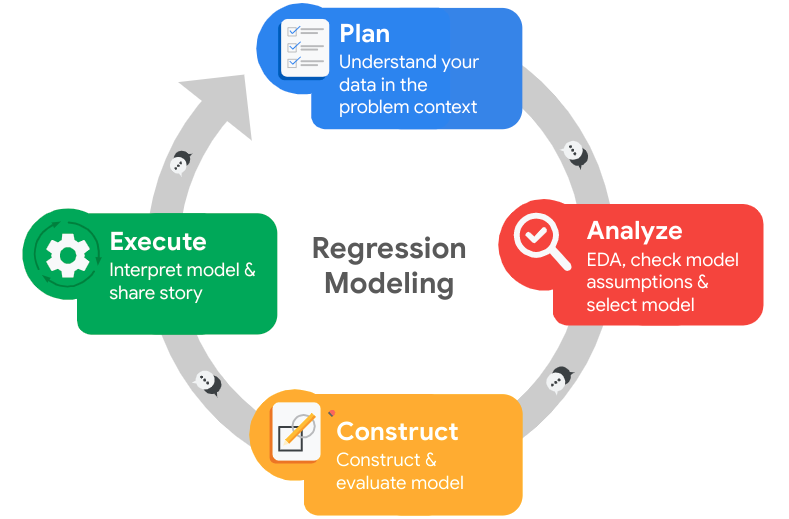

# Plan Stage

**Goal:** Optimize sales conversions of online advertising (click-to-convert).

We'll do this by looking at past sales data and using it to predict future outcomes, to maximize ad spend.

## About the Dataset

The data used in this project is from an anonymous organisation’s social media ad campaign. The dataset contains 1143 observations in 11 variables. Below are the descriptions of the variables.

| Variable                     | Description                                                                                   |
|------------------------------|-----------------------------------------------------------------------------------------------|
| ad_id                        | An unique ID for each ad.                                                                     |
| xyz_campaign_id              | An ID associated with each ad campaign of company.                                            |
| fb_campaign_id               | An ID associated with how Facebook tracks each campaign.                                      |
| age                          | Age of the person to whom the ad is shown.                                                    |
| gender                       | Gender of the person to whom the ad is shown.                                                 |
| interest                     | A code specifying the category to which the person’s interest belongs.                        |
| Impressions                  | The number of times the ad was shown.                                                         |
| Clicks                       | Number of clicks on for the ad.                                                               |
| Spent                        | Amount paid by company to Facebook, to show the ad.                                           |
| Total conversion(lead)       | Total number of people who enquired about the product after seeing the ad.                    |
| Approved conversion (sale)   | Total number of people who bought the product after seeing the ad.                            |

[Source page for dataset](https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking/data)

# Step 1: Imports

- Load standard Python packages
- Import the dataset (a local CSV)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress future warnings and deprecation warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [4]:
# Constants
RANDOM_STATE = 777

In [5]:
# Importing the dataset
df = pd.read_csv('fb_conversion_data.csv')

# Display the first 5 rows of the dataset
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


# Step 2. Initial Data Exploration

- Understanding the dataset
- Data cleaning (missing values, data types, duplicates)

In [6]:
# Show the data types of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


There are no null values in the data.

In [7]:
# Show the summary statistics of the age column
df['age'].value_counts()

age
30-34    426
45-49    259
35-39    248
40-44    210
Name: count, dtype: int64

The age column is categorical. We'll deal with that later but just make a note for now.

In [8]:
# Check the values of the gender column
df['gender'].value_counts()

gender
M    592
F    551
Name: count, dtype: int64

The gender column is balanced at nearly 50/50 men to women. We won't need to be concerned about that feature being out of balance.

In [9]:
# Check the range of the dataset
with pd.option_context('display.float_format', '{:.0f}'.format):
    print(df.describe())

        ad_id  xyz_campaign_id  fb_campaign_id  interest  Impressions  Clicks  \
count    1143             1143            1143      1143         1143    1143   
mean   987261             1067          133784        33       186732      33   
std    193993              122           20500        27       312762      57   
min    708746              916          103916         2           87       0   
25%    777632              936          115716        16         6504       1   
50%   1121185             1178          144549        25        51509       8   
75%   1121804             1178          144658        31       221769      38   
max   1314415             1178          179982       114      3052003     421   

       Spent  Total_Conversion  Approved_Conversion  
count   1143              1143                 1143  
mean      51                 3                    1  
std       87                 4                    2  
min        0                 0                    0  


In [10]:
# Get stats on the ads and campaigns
print(f'Number of Unique Ads: {df['ad_id'].nunique()}')
print(f'Number of Company Campaigns: {df['xyz_campaign_id'].nunique()}')
print(f'Number of FB Campaigns: {df['fb_campaign_id'].nunique()}')


Number of Unique Ads: 1143
Number of Company Campaigns: 3
Number of FB Campaigns: 691


For marketing it's important to find out which is the best performing campaign. We have 3 campaigns that can be broken down in the analysis. For more in-depth analysis we could break down to a specific ad variation at a specific hour of the day (and many other slices). However there is software that can do that for us at a granular level. [AdEspresso](https://adespresso.com/) is the one I used to use for automating the ad selection.

## Rename columns

- Make the column names consistent by changing them all to snakecase
- Rename the columns to make more sense. 
    - Total Conversion is really the total leads. It's not a conversion in the sense someone converted to a customer.
    - Approved Conversion is the final outcome - we made money (final step) as a result of step one (ad spend). Rename this to 'conversion' for clarity.

In [11]:
# Rename columns inplace
df.rename(columns={'Impressions': 'impressions',
                          'Clicks': 'clicks',
                          'Spent': 'spent',
                          'Total_Conversion': 'leads',
                          'Approved_Conversion': 'conversions'}, inplace=True)

# Display all column names after the update
df.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'impressions', 'clicks', 'spent', 'leads', 'conversions'],
      dtype='object')

In [12]:
# Change the column types to match the data type
categories = ['xyz_campaign_id', 'age', 'gender', 'interest']
df[categories] = df[categories].astype('category')

#### Change campaign names

Since there are three campaigns, we will give them meaningful names instead of the random numbers they are currently.

In [13]:
# Rename column (addressing Pandas 3.0 future warning)
# Assuming 'ser' is your categorical Series
new_categories = {916: 'campaign_a', 936: 'campaign_b', 1178: 'campaign_c'}
df['xyz_campaign_id'] = df['xyz_campaign_id'].cat.rename_categories(new_categories)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,leads,conversions
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1


### Check for Missing Values

In [14]:
# Check for missing values
df.isna().sum()

ad_id              0
xyz_campaign_id    0
fb_campaign_id     0
age                0
gender             0
interest           0
impressions        0
clicks             0
spent              0
leads              0
conversions        0
dtype: int64

### Check for Duplicates

Check for duplicate records in the dataset.

In [15]:
# Check for duplicates
df.duplicated().sum()

0

### Check for Outliers

A visual inspection of the earlier statistics shows the min/max ranges do not contain outliers.

# pAce - Analyze Stage

In this state we continue to perform EDA, analyzing the relationships between variables.

### Pair Plots

The scatterplot matrix below will show the relationships between variables.

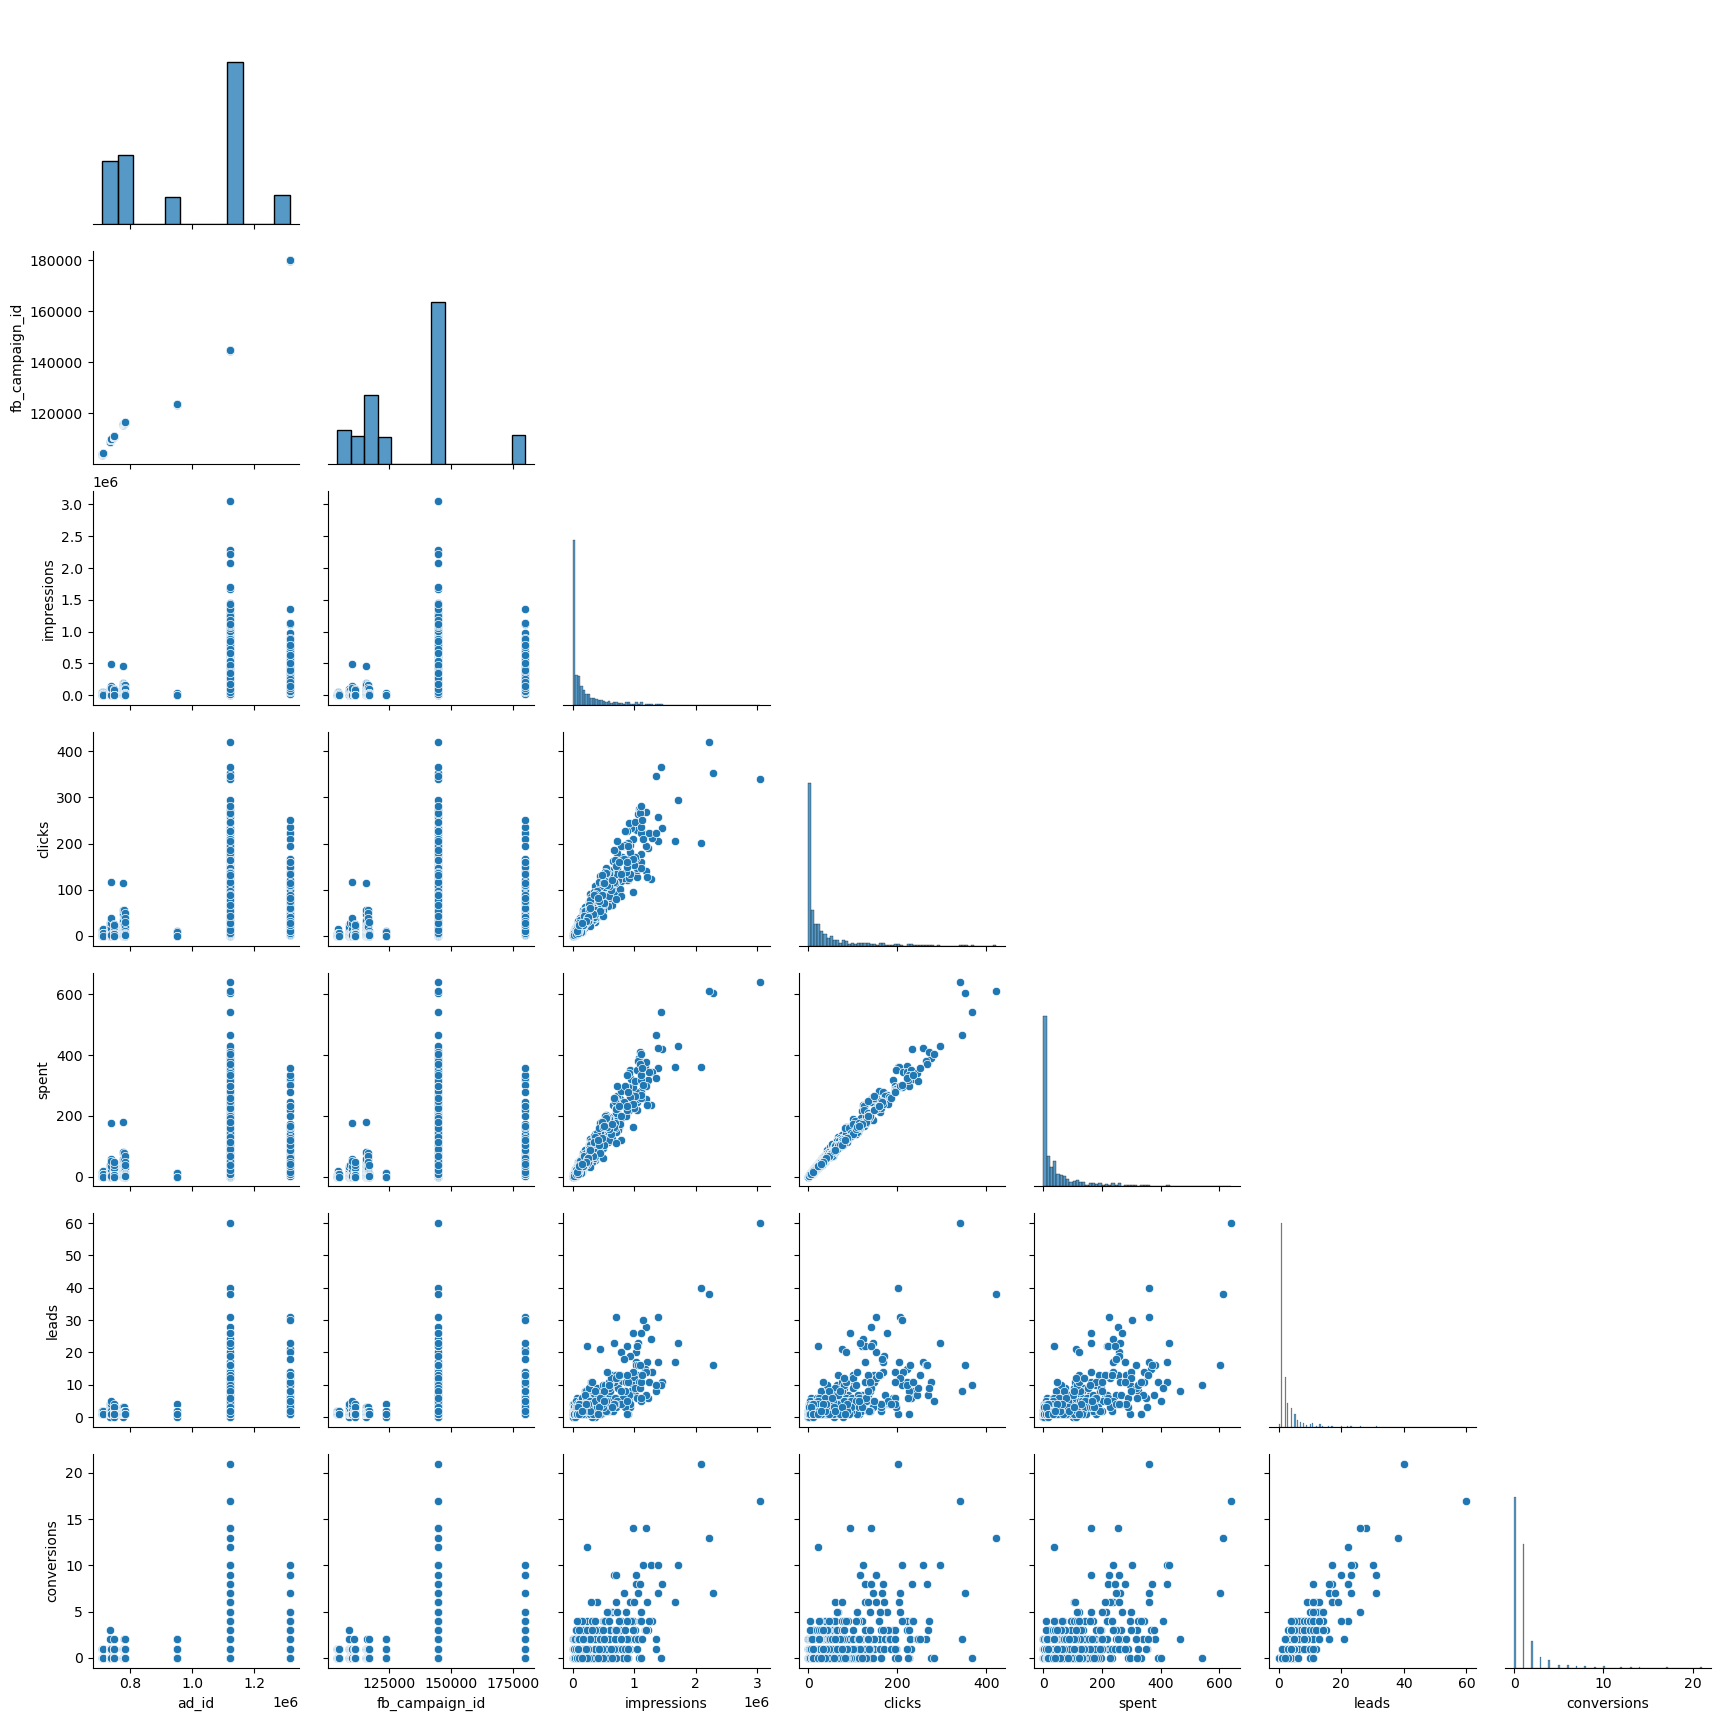

In [16]:
# Create a pair plot
sns.pairplot(data=df, corner=True)
plt.show()

We can see the linear relationships between 'clicks' and 'spent', and how 'impressions' relate to 'leads' and 'conversions'.

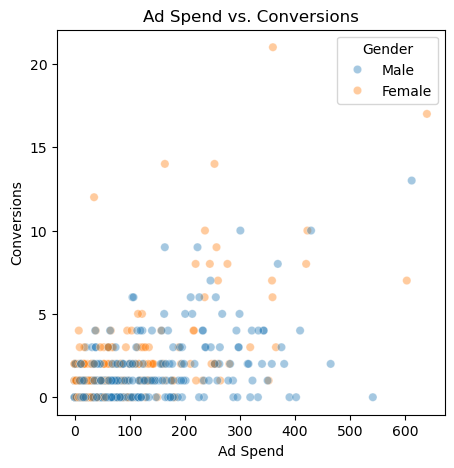

In [17]:
# Create a scatter plot of ad spend vs. conversions. The hue represents the gender
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x='spent', y='conversions', hue='gender', alpha=0.4)
plt.xlabel('Ad Spend')
plt.ylabel('Conversions')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Male', 'Female'], title='Gender')
plt.title('Ad Spend vs. Conversions')
plt.show()


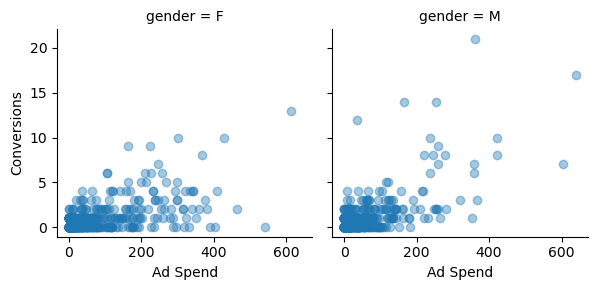

In [18]:
# Visually break down the conversions by gender
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "spent", "conversions", alpha=0.4)
g.set_axis_labels('Ad Spend', 'Conversions')
g.add_legend()

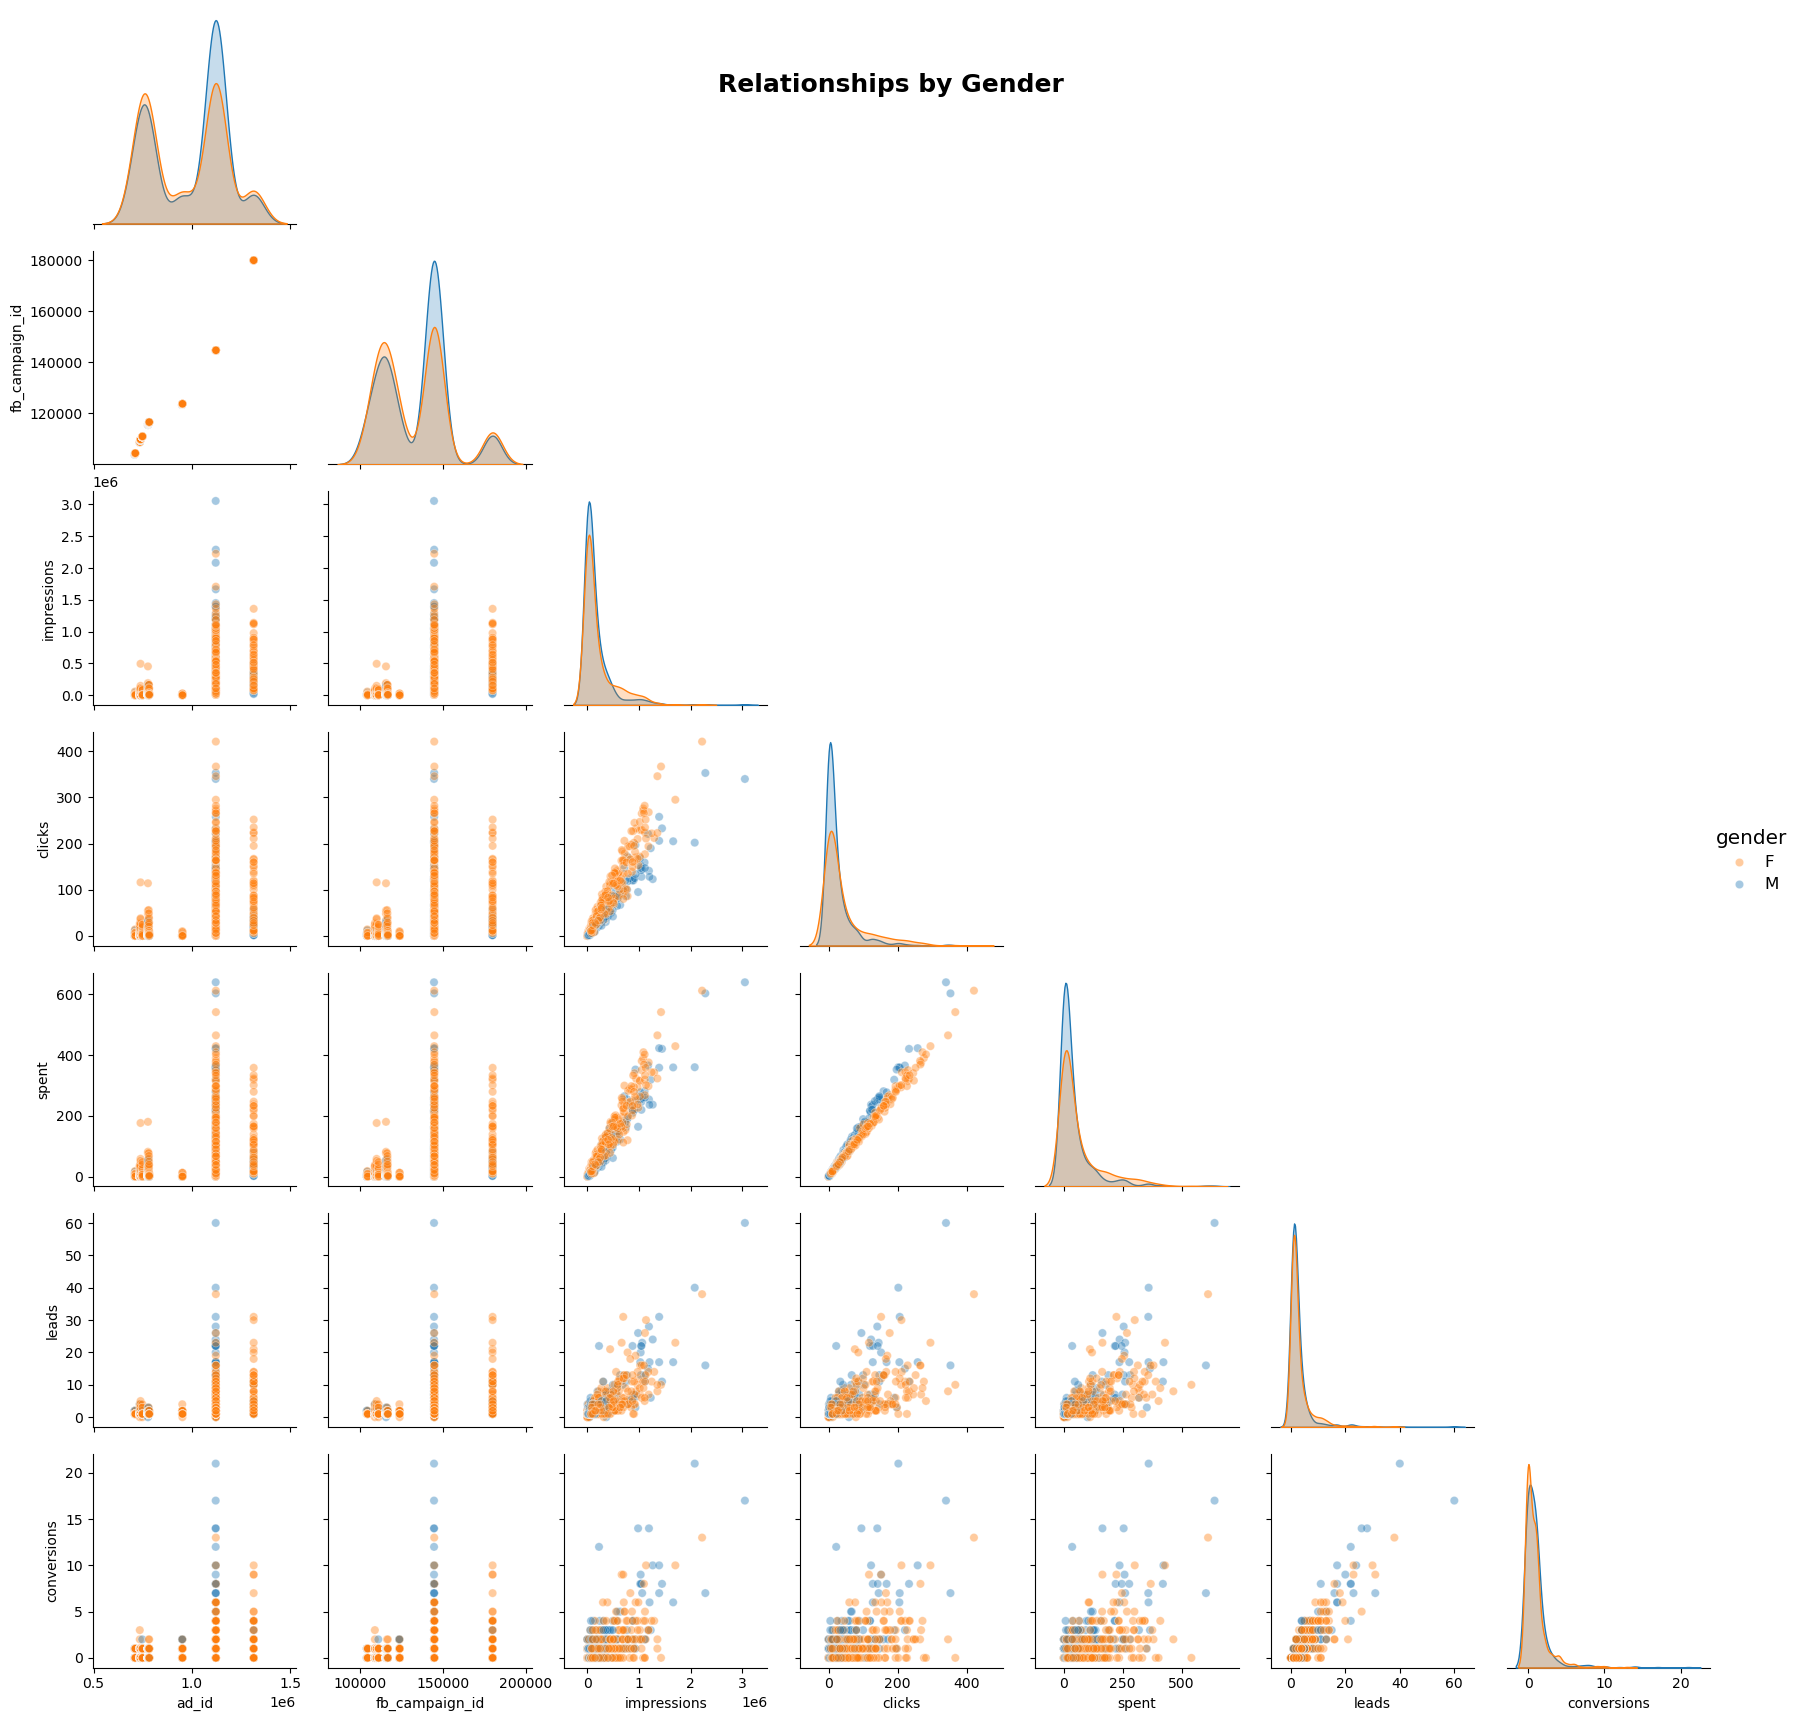

In [19]:
pairplot = sns.pairplot(df, corner=True, hue='gender', palette=['#ff7f0e', '#1f77b4'],
                        plot_kws={'alpha': 0.4})
plt.suptitle("Relationships by Gender", x=0.5 ,y=0.95, size=18, weight='bold')
# Increase the legend size
plt.setp(pairplot._legend.get_title(), fontsize='x-large') 
plt.setp(pairplot._legend.get_texts(), fontsize='large') 
plt.show()

Some interesting patterns are shown when looking at gender breakdown. Men have more clicks, which leads to more ad spend. However the number of leads is similar across genders. Women have slightly higher conversions.

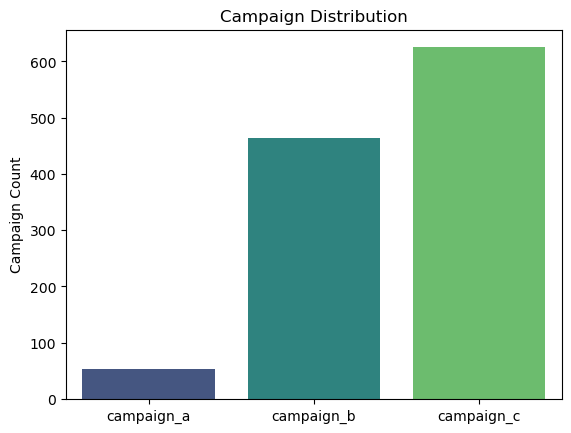

In [20]:
# plot the counts of ads run in each campaign
sns.countplot(x=df['xyz_campaign_id'], data=df, palette='viridis', hue=df['xyz_campaign_id'])
plt.title('Campaign Distribution')
plt.xlabel('')
plt.ylabel('Campaign Count')
plt.show()

Campaign C ran the most ads. We would need to confirm with the SME if that was done automatically by the ad engine or manually by the ad manager. The ad manager might have vital information for the analysis.

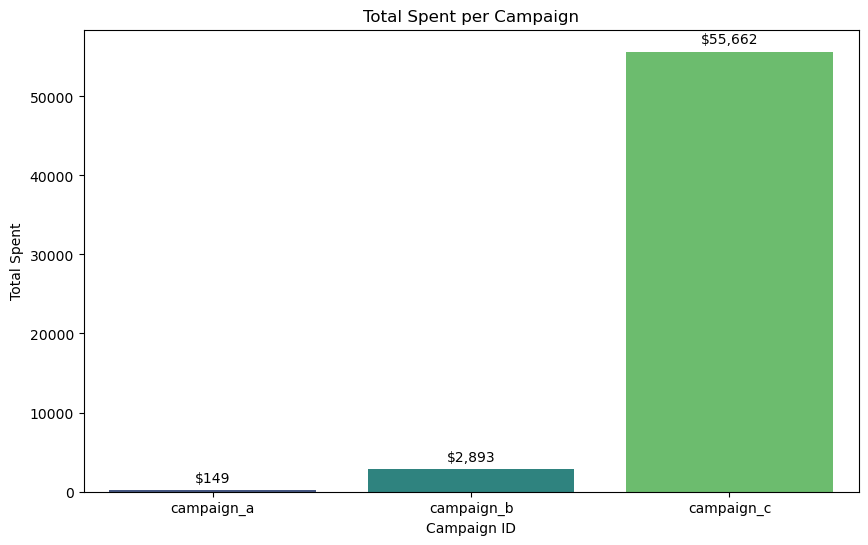

In [21]:
import locale
# Set locale for currency formatting
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# How much money was spent on each campaign?
# Calculate the total spent per campaign
total_spent_per_campaign = df.groupby('xyz_campaign_id', observed=True)['spent'].sum().reset_index()

# Plotting the bar plot with 'Spent' on the y-axis and hue for campaign ID
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='xyz_campaign_id', y='spent', hue='xyz_campaign_id', data=total_spent_per_campaign, estimator=sum, palette='viridis')

# Add the total spent on top of each bar
for i, row in total_spent_per_campaign.iterrows():
    text = f"${int(row.spent):,}"
    barplot.text(i, row.spent + 1000, text, color='black', ha="center")

plt.title('Total Spent per Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Total Spent')
plt.show()

Clearly Campaign C has been heavily invested in. 

Campaign A has barely had any ad-spend. Whatever results we might find from Campaign A will not be representative of the overall dataset. 

Campaign B has more ad-spend, but at only 5% of the spend of Campaign C, the analysis will still be unbalanced.

#### Who's Buying?


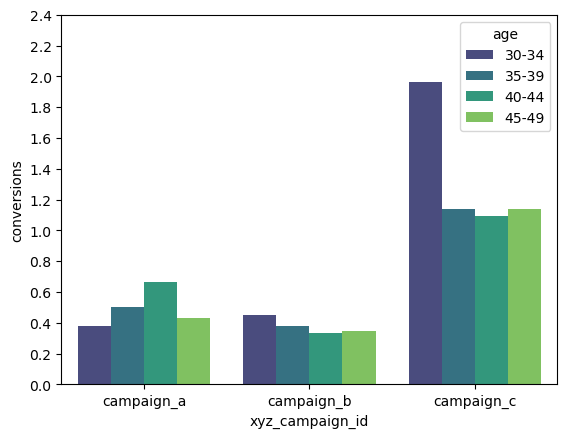

In [22]:
# Visualize the number of conversions by campaign and age group
sns.barplot(x=df['xyz_campaign_id'], y=df['conversions'], hue=df['age'], data=df, palette='viridis', errorbar=None)

# Get the current axes
ax = plt.gca()
# Set more granular ticks on the x-axis
ax.set_yticks(np.arange(0, 2.5, 0.2))  # Adjust the step to control granularity

plt.show()

In Campaign C, Age group 30-34 has a conversion rate of 2.0 compared to 1.2 for other age groups.

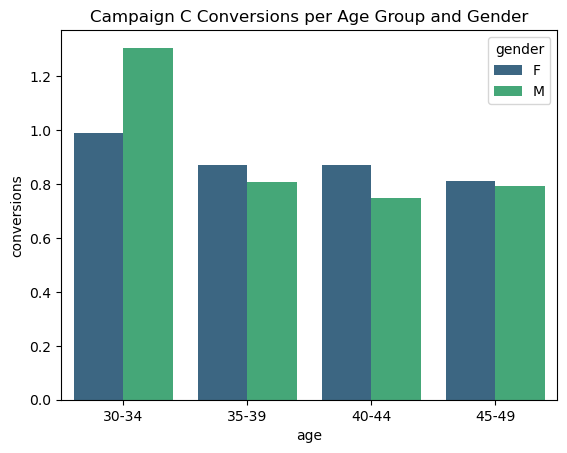

In [23]:
# Visualize the number of conversions for Campaign C by age and gender
sns.barplot(x=df['age'], y=df['conversions'], hue=df['gender'], 
                              data=df[df['xyz_campaign_id'] == 'campaign_c'], palette='viridis', errorbar=None)
plt.title('Campaign C Conversions per Age Group and Gender')
plt.show()                             

By age group, age 30-34 has the highest number of conversions. Females have 30% more conversions than males in this group. They also have 40% more conversions than females in any other age group.

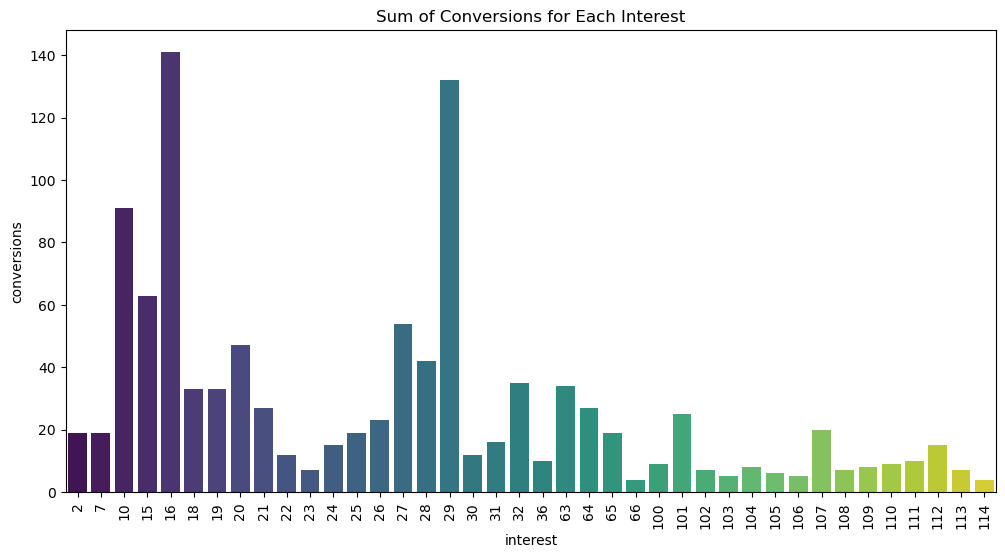

In [24]:
# Plot the conversion rates based on the interests of the user
# Step 1: Aggregate data
agg_data = df.groupby('interest', as_index=False, observed=True)['conversions'].sum()

plt.figure(figsize=(12, 6))  # Set the figure size to 12 inches wide by 6 inches tall
sns.barplot(x='interest', y='conversions', data=agg_data, palette='viridis', hue='interest', legend=False)
plt.title('Sum of Conversions for Each Interest')
plt.xticks(rotation=90)
plt.show()

By summing the total conversion by interest, we see targeting certain interest groups have much higher conversions than others. Note this doesn't mean they are profitable targets, only that they have more conversions. An interest group with less conversions can outperform one with more conversions if the Cost-per-conversion is lower. Anybody can spend $2 to make $1. Optimization is about spending $1 and making $2.

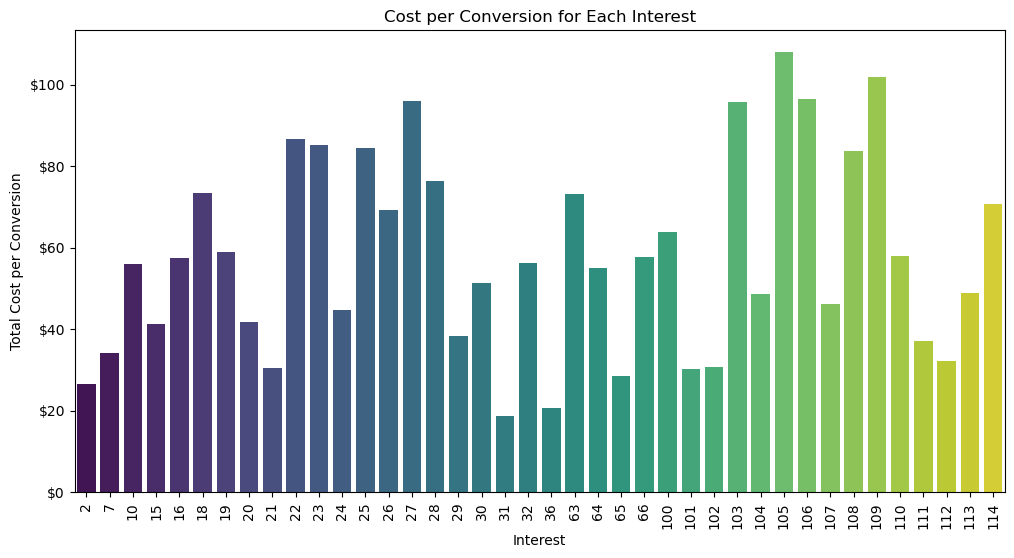

In [25]:
from matplotlib.ticker import FuncFormatter

# Summarize the cost per conversion for each interest
cost_per_conversion = df.groupby('interest').apply(lambda x: x['spent'].sum() / x['conversions'].sum())
# Convert Series to DataFrame and reset index
df_cost_per_conversion = cost_per_conversion.reset_index(name='cost_per_conversion')

plt.figure(figsize=(12,6))
sns.barplot(x='interest', y='cost_per_conversion', data=df_cost_per_conversion, palette='viridis', hue='interest', legend=False)
plt.title('Cost per Conversion for Each Interest')
plt.xticks(rotation=90)
plt.ylabel('Total Cost per Conversion')
plt.xlabel('Interest')
# Formatting function for currency
def currency(x, pos):
    return '${:,.0f}'.format(x)

# Apply currency formatting to the y-ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

plt.show()

Interest-16 and Interest-29 had the most conversions (from the previous chart) 

- Interest-16 cost $60 for each conversion. 
- Interest-29 cost less than $40 for each conversion.

Interest-16 cost $20 more for each conversion, when considering ad-spend accross all ages and genders. We don't have enough information to know if that matters. If the dataset included the conversion value, or LTV of the customer we could do more analysis.

### Click-thru rate

CTR is one of the big conversion metrics in advertising. All of the ad platforms provide a CTR and CPC for campaign metrics. These are helpful metrics but they only tell a partial story, and need to be analyzed and interpreted carefully. It's easy to get a high CTR that leads to no conversions - just use a cat picture with a catchy headline:

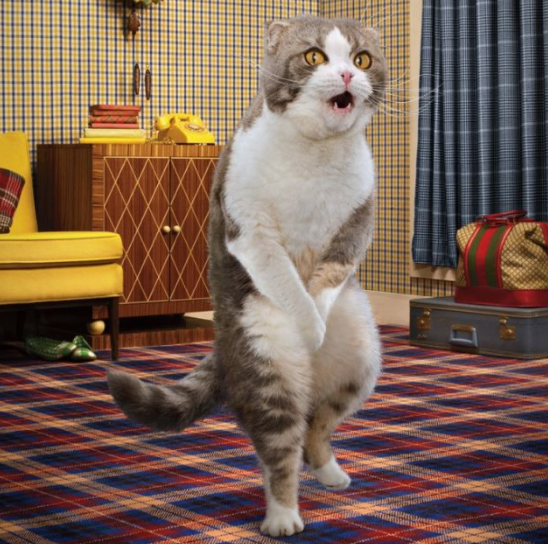

**Click me if you noticed the Louis Vitton luggage**

We have to know what the goals are first. Maybe exposure is the most important metric for a campaign, and trying to get to the elusive twelve exposures to build trust and/or awareness.

We'll use the click-thru analysis to see if anything jumps out as significant.

In [26]:
# Compute the CTR
df['ctr'] = (df['clicks'] / df['impressions']) * 100

Text(0, 0.5, 'CTR')

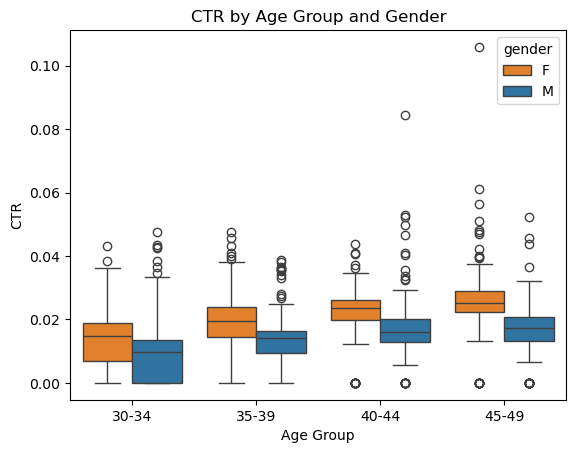

In [27]:
# Create a box plot of CTR by age group
sns.boxplot(x=df['age'], y=df['ctr'], hue=df['gender'], palette=['#ff7f0e', '#1f77b4'])
plt.title("CTR by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("CTR")

Women have higher CTR for every age group.

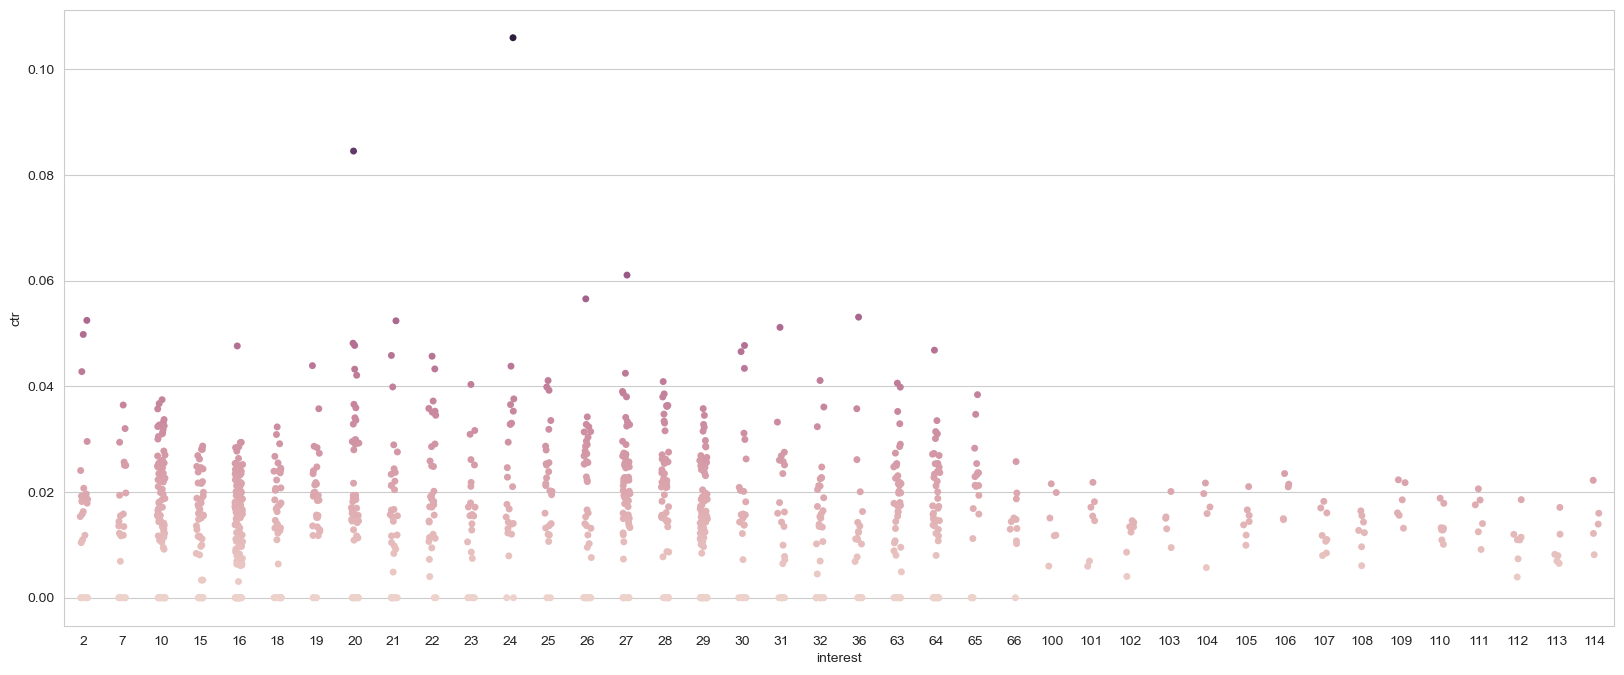

In [28]:
# Plot the CTR for each interest
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.stripplot(x='interest', y='ctr', data=df, hue='ctr')
plt.legend().set_visible(False)

### Insights on CTR

Females in the 45-49 age group have the highest CTR.

The interest categories with lower numbers have higher CTR.

If we were building a campaign that prioritizes higher CTRs, these would be the targeting/retargeting/like groups to consider.

### Correlation Matrix

How are the variables influencing each other?

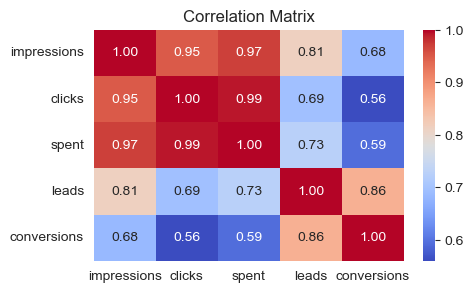

In [29]:
# Select the columns of interest
df_numerics = df[['impressions', 'clicks', 'spent', 'leads', 'conversions']]

# Calculate the correlation matrix
corr_matrix = df_numerics.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(5,3))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

As we would expect - spending, impressions, and clicks are all highly correlated. The more money that's spent on advertising, the more impressions. And if the ads are targeted properly, relevant, and well-written ads - the more clicks.

## Insights

- The targeted age-group has a great impact on conversions. 
- Men have a 30% higher conversion rate than women in the 30-34 age group.
- Interest-16 and Interest-29 have the highest number of conversions. 
- Interest-110 has the highest cost per conversion at $105/conversion, while Interest-31 is only $20/conversion. 

# paCe: Construct Stage

- Determine which models are most appropriate
- Construct the model 
- Confirm model assumptions
- Evaluate model results to determine how well the model fits the data


## Model assumptions
🔎
- Outcome variable is continuous (sales)
- Leads and sales are distinct (otherwise we could just drop the leads)
- We have enough data


To determine which models are most appropriate, we will test a variety of models used for regression. We are looking for the model and features that can best lead to a conversion. We consider:

#### Linear Regression

Linear regression is a basic and widely used method for regression problems. It assumes there is a linear relationship between the independent variables and dependent variable('sale'). Advertising data often has a linear trend: Spend $1, make $2. If we spend $100, the trend usually doesn't curve to $300 (or whatever).

#### Decision Tree Regressor

Decision trees are good for capturing non-linear relationships between features. In our dataset the 'interests' are not linear. Having more/less/different 'interests' may require a non-linear model.

#### Random Forest Regressor

Random forests are an ensemble learning method. This method builds multiple decision trees and combines their predictions. Like the Decision Tree Regressor, it can model complex non-linear relationships like our dataset.

#### Gradient Boosting Regressor

Gradient boosting builds an ensemble of trees sequentially. Each tree tries to correct the errors of the previous one. It's effective in reducing bias and can handle complex datasets.

#### Suport Vector Regression

SVR is good at handling non-linear data and is effective in high-dimensional spaces. It is computationally intensive (it runs while I'm making lunch), but can provide good performance with the right tuning.

#### XGBoost Regressor

XGBoost optimizes gradient boosting. It provides regularization to prevent overfitting. 

## Modeling Implementation

Thus, we have a mix of potential models that can handle both linear and non-linear data, and complex relationships. They are all built for our task of regression modeling in predicting a continuous output variable.

Since we are testing several models, our code is built to loop through each model and summarize the final results.

1. Fit each model to non-normalized (raw) data
2. Fit each model to normalized (scaled) data
3. Fit each model to a range of hyperparameters ${^*}$
4. Fit each model to the best hyperparameters ${^*}$

${^*}$ <i>Linear Regression does not have hyperparameters and is not included in this step.</i>

<b>Our measure for selecting the best model is r-squared</b>. We want to know what variables best explain the model. Then we can focus on those variables in future advertising that lead to the highest sales conversions. For example we already know certain 'interests' lead to higher conversions than other 'interests'.

## Prepare data for modeling


In [30]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,leads,conversions,ctr
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1,0.013605
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0,0.011198
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0,0.023480
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1,0.024195


In [31]:
df_enc = df.copy()
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ad_id            1143 non-null   int64   
 1   xyz_campaign_id  1143 non-null   category
 2   fb_campaign_id   1143 non-null   int64   
 3   age              1143 non-null   category
 4   gender           1143 non-null   category
 5   interest         1143 non-null   category
 6   impressions      1143 non-null   int64   
 7   clicks           1143 non-null   int64   
 8   spent            1143 non-null   float64 
 9   leads            1143 non-null   int64   
 10  conversions      1143 non-null   int64   
 11  ctr              1143 non-null   float64 
dtypes: category(4), float64(2), int64(6)
memory usage: 77.8 KB


#### Label Encoding
The feature Gender will be label encoded.

In [32]:
df_enc['gender'] = np.where(df_enc['gender'] == 'M', 1, 0)
df_enc['gender'].value_counts()

gender
1    592
0    551
Name: count, dtype: int64

#### One-Hot Encoding

The age, campaign_id, and interest columns are categorical. We will use one-hot encoding to convert them into numerical values.

In [33]:
print(f'Unique values in the age column: {df_enc['age'].nunique()}')
print(f'Unique values in the xyz_campaign_id column: {df_enc['xyz_campaign_id'].nunique()}')
print(f'Unique values in the interest column: {df_enc['interest'].nunique()}')

Unique values in the age column: 4
Unique values in the xyz_campaign_id column: 3
Unique values in the interest column: 40


In [34]:
df_enc = pd.get_dummies(df_enc, columns=['age', 'xyz_campaign_id', 'interest'], drop_first=True)
df_enc.head()

,ad_id,fb_campaign_id,gender,impressions,clicks,spent,leads,conversions,ctr,age_35-39,...,interest_105,interest_106,interest_107,interest_108,interest_109,interest_110,interest_111,interest_112,interest_113,interest_114
0,708746,103916,1,7350,1,1.43,2,1,0.013605,False,...,False,False,False,False,False,False,False,False,False,False
1,708749,103917,1,17861,2,1.82,2,0,0.011198,False,...,False,False,False,False,False,False,False,False,False,False
2,708771,103920,1,693,0,0.00,1,0,0.000000,False,...,False,False,False,False,False,False,False,False,False,False
3,708815,103928,1,4259,1,1.25,1,0,0.023480,False,...,False,False,False,False,False,False,False,False,False,False
4,708818,103928,1,4133,1,1.29,1,1,0.024195,False,...,False,False,False,False,False,False,False,False,False,False


#### Feature selection

Starting off we'll let the models set a baseline before introducing a bunch of changes. We know cost-per-click and cost-per-conversion can be feature engineered.

In [35]:
df_clean = df_enc.drop(columns=['ad_id', 'fb_campaign_id', 'ctr'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      1143 non-null   int64  
 1   impressions                 1143 non-null   int64  
 2   clicks                      1143 non-null   int64  
 3   spent                       1143 non-null   float64
 4   leads                       1143 non-null   int64  
 5   conversions                 1143 non-null   int64  
 6   age_35-39                   1143 non-null   bool   
 7   age_40-44                   1143 non-null   bool   
 8   age_45-49                   1143 non-null   bool   
 9   xyz_campaign_id_campaign_b  1143 non-null   bool   
 10  xyz_campaign_id_campaign_c  1143 non-null   bool   
 11  interest_7                  1143 non-null   bool   
 12  interest_10                 1143 non-null   bool   
 13  interest_15                 1143 

### Splitting the dataset

We will model both with/without feature scaling, so we create datasets for each. Our variables are:

- (1) No feature scaling
- (2) With feature scaling

In [36]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=['conversions'])
y = df_clean['conversions']
X1 = X.copy()
X2 = X.copy()
y1 = y.copy()
y2 = y.copy()

In [37]:
# numeric columns that will be scaled later
nums = ['impressions', 'clicks', 'spent']

In [38]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=RANDOM_STATE)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=RANDOM_STATE)

In [39]:
# Feature scaling of X2_train and X2_test
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# Fit the scaler on the training data and transform it
X2_train[nums] = ss.fit_transform(X2_train[nums])

# Transform the test data with the same scaler
X2_test[nums] = ss.transform(X2_test[nums])

X2_train[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
impressions,914.0,-9.717488e-18,1.000547,-0.604869,-0.583687,-0.434664,0.120045,7.321399
clicks,914.0,6.802242e-18,1.000547,-0.582843,-0.564151,-0.433303,0.052703,6.277318
spent,914.0,4.567219e-17,1.000547,-0.589036,-0.571420,-0.446090,0.077527,6.792306


## Modeling Approach

To determine which models are most appropriate, we will test a variety of models used for regression. We are looking for the model and features that can best lead to a conversion.

#### Linear Regression

Linear regression is a basic and widely used method for regression problems. It assumes there is a linear relationship between the independent variables and dependent variable('sale'). Advertising data often has a linear trend: Spend $1, make $2. If we spend $100, the trend usually doesn't curve to $300 (or whatever).

#### Decision Tree Regressor

Decision trees are good for capturing non-linear relationships between features. In our dataset the 'interests' are not linear. Having more/less/different 'interests' may require a non-linear model.

#### Random Forest Regressor

Random forests are an ensemble learning method. This method builds multiple decision trees and combines their predictions. Like the Decision Tree Regressor, it can model complex non-linear relationships like our dataset.

#### Gradient Boosting Regressor

Gradient boosting builds an ensemble of trees sequentially. Each tree tries to correct the errors of the previous one. It's effective in reducing bias and can handle complex datasets.

#### Suport Vector Regression

SVR is good at handling non-linear data and is effective in high-dimensional spaces. It is computationally intensive (it runs while I'm making lunch), but can provide good performance with the right tuning.

#### XGBoost Regressor

XGBoost optimizes gradient boosting. It provides regularization to prevent overfitting. 

## Modeling Implementation

Thus, we have a mix of potential models that can handle both linear and non-linear data, and complex relationships. They are all built for our task of regression modeling in predicting a continuous output variable.

Since we are testing several models, our code is built to loop through each model and summarize the final results.

1. Fit each model to non-normalized (raw) data
2. Fit each model to normalized (scaled) data
3. Fit each model to a range of hyperparameters ${^*}$
4. Fit each model to the best hyperparameters ${^*}$

${^*}$ <i>Linear Regression does not have hyperparameters and is not included in this step.</i>

<b>Our measure for selecting the best model is r-squared</b>. We want to know what variables best explain the model. Then we can focus on those variables in future advertising that lead to the highest sales conversions. For example we already know certain 'interests' lead to higher conversions than other 'interests'.

### Standard Imports

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

We build a list of models to iterate through during training and testing.

In [41]:
# Create a dictionary to map model names to their respective classes
model_classes = {
    'Linear Regression': LinearRegression,
    'Decision Tree': DecisionTreeRegressor,
    'Random Forest': RandomForestRegressor,
    'Gradient Boosting': GradientBoostingRegressor,
    'Support Vector Regression': SVR,
    'XGB Regressor': XGBRegressor
}

### Helper functions

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Print the output in a formatted way
def print_results(model_name, r2, mse, mae):
    print(f'Model: {model_name:<25} | R^2 Score: {r2:8.4f} | MSE: {mse:8.4f} | MAE: {mae:8.4f}')

# Evaluate the model and return the evaluation metrics
def evaluate(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    # Print the results
    print_results(model_name, r2, mse, mae)

    return r2, mse, mae


### Model Evaluation - No Feature Scaling

In [43]:
df_non_results = pd.DataFrame(columns=['Model', 'R2', 'MSE', 'MAE'])

for name, model_class in model_classes.items():
    print(f'EVALUATING...{name}')
    model = model_class()

    # Fit the model
    model.fit(X1_train, y1_train)

    # Evaluate the model on the test data
    r2, mse, mae = evaluate(name, model, X1_test, y1_test)

    # Save the results in a dataframe
    df_metrics = pd.DataFrame({'Model':[name], 'R2': [r2], 'MSE': [mse], 'MAE': [mae]})
    df_non_results = pd.concat([df_non_results, df_metrics], ignore_index=True)
    

EVALUATING...Linear Regression
Model: Linear Regression         | R^2 Score:   0.8252 | MSE:   0.9250 | MAE:   0.6936
EVALUATING...Decision Tree
Model: Decision Tree             | R^2 Score:   0.6980 | MSE:   1.5983 | MAE:   0.8035
EVALUATING...Random Forest
Model: Random Forest             | R^2 Score:   0.8202 | MSE:   0.9513 | MAE:   0.7161
EVALUATING...Gradient Boosting
Model: Gradient Boosting         | R^2 Score:   0.8301 | MSE:   0.8992 | MAE:   0.6906
EVALUATING...Support Vector Regression
Model: Support Vector Regression | R^2 Score:   0.3147 | MSE:   3.6261 | MAE:   0.9619
EVALUATING...XGB Regressor
Model: XGB Regressor             | R^2 Score:   0.7591 | MSE:   1.2748 | MAE:   0.7555


### Evaluation results without feature scaling

In [44]:
df_non_results.sort_values(['R2'], ascending=False)

,Model,R2,MSE,MAE
3,Gradient Boosting,0.830072,0.899206,0.690576
0,Linear Regression,0.825204,0.924969,0.693612
2,Random Forest,0.820224,0.951320,0.716114
5,XGB Regressor,0.759090,1.274821,0.755521
1,Decision Tree,0.697970,1.598253,0.803493
4,Support Vector Regression,0.314749,3.626143,0.961921


### Model evaluation with feature scaling

In [45]:
df_norm_results = pd.DataFrame(columns=['Model', 'R2', 'MSE', 'MAE', 'actual_model'])

for name, model_class in model_classes.items():
    print(f'EVALUATING...{name}')
    model = model_class()

    # Fit the model
    model.fit(X2_train, y2_train)

    # Evaluate the model on the test data
    r2, mse, mae = evaluate(name, model, X2_test, y2_test)

    # Save the results in a dataframe
    df_metrics = pd.DataFrame({'Model':[name], 'R2': [r2], 'MSE': [mse], 'MAE': [mae], 'actual_model': [model]})
    df_norm_results = pd.concat([df_norm_results, df_metrics], ignore_index=True)
    

EVALUATING...Linear Regression
Model: Linear Regression         | R^2 Score:   0.8252 | MSE:   0.9250 | MAE:   0.6936
EVALUATING...Decision Tree
Model: Decision Tree             | R^2 Score:   0.6617 | MSE:   1.7904 | MAE:   0.7860
EVALUATING...Random Forest
Model: Random Forest             | R^2 Score:   0.8241 | MSE:   0.9307 | MAE:   0.7142
EVALUATING...Gradient Boosting
Model: Gradient Boosting         | R^2 Score:   0.8325 | MSE:   0.8864 | MAE:   0.6871
EVALUATING...Support Vector Regression
Model: Support Vector Regression | R^2 Score:   0.5415 | MSE:   2.4265 | MAE:   0.8110
EVALUATING...XGB Regressor
Model: XGB Regressor             | R^2 Score:   0.7591 | MSE:   1.2748 | MAE:   0.7555


### Evaluation results with feature scaling

In [46]:
df_norm_results.sort_values(['R2'], ascending=False)

,Model,R2,MSE,MAE,actual_model
3,Gradient Boosting,0.832488,0.886425,0.687081,([DecisionTreeRegressor(criterion='friedman_ms...
0,Linear Regression,0.825204,0.924969,0.693612,LinearRegression()
2,Random Forest,0.824116,0.930726,0.714236,"(DecisionTreeRegressor(max_features=1.0, rando..."
5,XGB Regressor,0.759090,1.274821,0.755521,"XGBRegressor(base_score=None, booster=None, ca..."
1,Decision Tree,0.661660,1.790393,0.786026,DecisionTreeRegressor()
4,Support Vector Regression,0.541459,2.426463,0.810979,SVR()


### Hyperparameter Tuning / Model Validation

Create pipelines for each classifier. We'll use the pipelines again later with the feature scaled data.

In [47]:
from sklearn.pipeline import Pipeline
pipelines = {
             'Linear Regression': Pipeline([('reg', LinearRegression())]),   
             'Decision Tree': Pipeline([('reg', DecisionTreeRegressor(random_state=RANDOM_STATE))]),
             'Random Forest': Pipeline([('reg', RandomForestRegressor(random_state=RANDOM_STATE))]),
             'Gradient Boosting': Pipeline([('reg', GradientBoostingRegressor(random_state=RANDOM_STATE))]),
             'XGB Regressor' : Pipeline([('reg', XGBRegressor(random_state=RANDOM_STATE))]),
             #'SVR' : Pipeline([('reg', SVR())]),
             }

#### Define the hyperparameters to check

Each model will have different parameters that will be used to find the best fit.

In [48]:

hyperparameters_lr = {'reg__fit_intercept' : [True, False]}

hyperparameters_dt = {'reg__criterion' : ['squared_error', 'absolute_error'],
                      'reg__max_depth' : [None, 5, 10],
                      'reg__min_samples_split' : [2, 5, 10],
                      'reg__min_samples_leaf' : [1, 2, 4],
                      'reg__splitter' : ['best']}

hyperparameters_rf = {'reg__n_estimators': [50, 60, 75, 100, 120],
                      'reg__max_depth' : [None, 5, 10],
                      'reg__min_samples_split' : [2, 3, 5],
                      'reg__min_samples_leaf' : [1, 2, 4],
                     'reg__max_features':['sqrt', 'log2', None, 0.5, 0.3, 10, 20]}

hyperparameters_gb = {'reg__n_estimators' : [int(x) for x in np.linspace(10, 50, num = 5)],
                      'reg__criterion' : ['friedman_mse', 'squared_error'],
                      'reg__max_depth' : [1, 2, 3],
                      'reg__min_samples_split' : [2, 3, 5],
                      'reg__min_samples_leaf' : [2, 3, 5],
                      'reg__max_features' : ['sqrt'],
                      'reg__loss' : ['squared_error', 'absolute_error', 'huber', 'quantile']}

hyperparameters_xgb = {
                    'reg__eta': [0.01, 0.05, 0.1, 0.2],  # Learning rate, smaller values make the model more robust
                    'reg__max_depth': [3, 6, 9],  # Depth of trees, deeper trees can model more complex patterns
                    'reg__min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
                    'reg__subsample': [0.5, 0.75, 1.0],  # Subsample ratio of the training instances
                    'reg__colsample_bytree': [0.5, 0.75, 1.0],  # Subsample ratio of columns when constructing each tree
                    'reg__n_estimators': [100, 200, 300]  # Number of trees, more trees can lead to better performance but longer training time
}

hyperparameters_svr = {'reg__C': [0.1, 1, 10],
                    'reg__kernel': ['linear'],#, 'rbf'],
                    'reg__gamma': ['scale'],
                    'reg__tol': [1e-3],
                    'reg__epsilon': [0.1, 0.5]}

#Instantiate hyperparapeter dictionary
hyperparameters = {'Linear Regression' : hyperparameters_lr,
                   'Gradient Boosting' : hyperparameters_gb,
                   'XGB Regressor' : hyperparameters_xgb,
                   'SVR' : hyperparameters_svr,
                   'Decision Tree' : hyperparameters_dt,
                   'Random Forest' : hyperparameters_rf,
                   }
     

Perform K-fold cross-validation on the dataset for each combination of parameters.

In [49]:

from sklearn.model_selection import GridSearchCV

# Create a pipeline for each model
def fit_pipelines(pipeline_dict: dict, param_dict: dict, X_train, y_train):
    fitted_models = {}
    for name, pipeline in pipeline_dict.items():
        print(f'Fitting pipeline: {name}')
        # Instantiate a grid search
        model = GridSearchCV(estimator=pipeline,
                             param_grid=param_dict[name],
                             scoring='r2',
                             cv=5, n_jobs=-1)
        model.fit(X_train, y_train)
        # Append the model for testing later
        fitted_models[name] = model
    
    return fitted_models

Run all of the pipelines to train each model type with their respective parameters.

In [50]:
model_fits = fit_pipelines(pipelines, hyperparameters, X1_train, y1_train)

Fitting pipeline: Linear Regression
Fitting pipeline: Decision Tree
Fitting pipeline: Random Forest
Fitting pipeline: Gradient Boosting


invalid value encountered in cast


Fitting pipeline: XGB Regressor


Now we evaluate each model type using the best parameters that were found during training.

In [51]:
df_best_hp_results = pd.DataFrame(columns=['Model', 'R2', 'MSE', 'MAE'])

print('Evaluating each model with the best parameters...')
# Loop through the models, instantiate them with the best parameters, fit, and evaluate
for name, model_class in model_classes.items():
    # For testing, sometimes models are commented out and need to be skipped
    if name not in model_fits:
        print(f'Skipping... {name}')
        continue
    # Extract best parameters for the current model, removing the 'reg__' prefix from the pipeline
    best_params = {key.replace('reg__', ''): value for key, value in model_fits[name].best_params_.items()}
    
    # Instantiate the model with the best params
    model = model_class(**best_params)

    # Fit again
    model.fit(X1_train, y1_train)

    # Evaluate the model against the testing data, getting the evaluation metrics back
    r2, mse, mae = evaluate(name, model, X1_test, y1_test)

    # Add the results for outputting later
    df = pd.DataFrame({'Model':[name], 'R2': [r2], 'MSE': [mse], 'MAE': [mae], 'actual_model': [model]})
    df_best_hp_results = pd.concat([df_best_hp_results, df], ignore_index=True)


Evaluating each model with the best parameters...
Model: Linear Regression         | R^2 Score:   0.8248 | MSE:   0.9269 | MAE:   0.6950
Model: Decision Tree             | R^2 Score:   0.7573 | MSE:   1.2841 | MAE:   0.7465
Model: Random Forest             | R^2 Score:   0.8138 | MSE:   0.9851 | MAE:   0.6989
Model: Gradient Boosting         | R^2 Score:   0.7915 | MSE:   1.1032 | MAE:   0.7361
Skipping... Support Vector Regression
Model: XGB Regressor             | R^2 Score:   0.8226 | MSE:   0.9390 | MAE:   0.6896


In [52]:
# Show the results from best to worst of each model
df_best_hp_results.sort_values('R2', ascending=False)

,Model,R2,MSE,MAE,actual_model
0,Linear Regression,0.824847,0.926857,0.694988,LinearRegression(fit_intercept=False)
4,XGB Regressor,0.822554,0.938993,0.689560,"XGBRegressor(base_score=None, booster=None, ca..."
2,Random Forest,0.813833,0.985137,0.698902,"(DecisionTreeRegressor(max_depth=5, min_sample..."
3,Gradient Boosting,0.791525,1.103185,0.736052,([DecisionTreeRegressor(criterion='friedman_ms...
1,Decision Tree,0.757334,1.284115,0.746542,"DecisionTreeRegressor(max_depth=5, min_samples..."


### Best Model

Gradient Boost with no feature scaling.

From the best performing model extract the features of most importance. *Note that if Linear Regression is the best, this will not work and get an error. Linear Regression does not have a feature_importances_ variable.

In [53]:
top_entry = df_norm_results.sort_values('R2', ascending=False).head(1)

feature_importances = top_entry['actual_model'].values[0].feature_importances_

#### Plot the most important features from the best performing model.

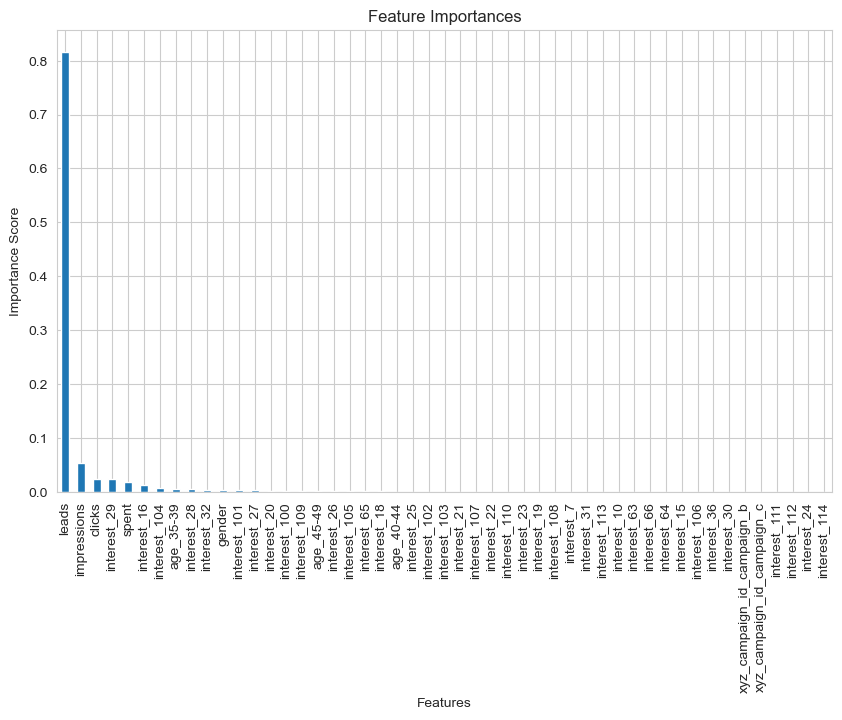

In [54]:
features = pd.Series(feature_importances, index=X1_train.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
features.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

Leads is by far the biggest influence on conversions. Let's take that away, as well as other linear features and see what categorical features are left over that influence the model.

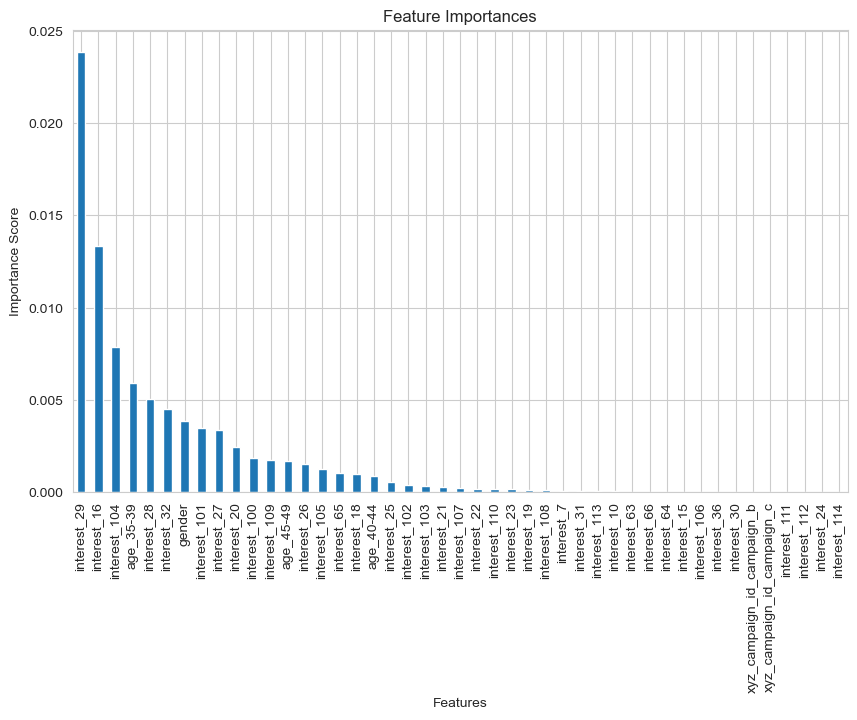

In [55]:
features2 = features.drop(['leads', 'spent', 'clicks', 'impressions'])

# Continue with plotting
plt.figure(figsize=(10, 6))
features2.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

From the Feature Importances chart we get an idea of the most important categories and age groups.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

### Summary of model results.

The best model was Gradient Boost with no feature scaling. The best parameters had an R2 of 83%, which means the features explained 83% of the target variable. MSE of 0.899 and MAE of 0.690.

The Linear Regression was the second best model with an R2 of 0.825, MSE of 0.925 and MAE of 0.693.

## Conclusions, Recommendations, Next Steps

The Linear Regression model would have worked fine under the existing circumstances. It's biggest limitation is it will become less reliable as more features are added. The model will grow more and more complex, and likely underfit the complex relationships.

The strength of Gradient Boosting is it's ability to model complex relationships that may not be linear. Gradient Boost would likely continue to improve as more features are added from campaigns:

- Income level
- Relationship status
- Geolocation
- Time of day/week
- Other options available by platforms to group users.

This information was not available in the dataset, but is routinely used by marketers to refine who to target and when.

### Next Steps

The addition of lead value, conversion value, and customer-lifetime-value would have further helped refine the model and make it more accurate to identify who to target. This information can be addeded to the campaign inputs before a campaign begins.

We were able to identify some interests that converted better, and which genders/age groups converted better among interests. For the next campaign these better performing interests should be targeted. The same ads/ad groups should be used for the next audience to avoid introducing noise that could mess up the next analysis.

A clearer set of objectives and the addition of more features/data would yield better predictive capability, to make better business decisions.